# NO REAL DATA

In [1]:
from simulation.patient import Patient
from simulation.department import Department
from simulation.simulation import Simulation

%load_ext autoreload
%autoreload 2

## Patient and Department Basics

In [2]:
p1 = Patient('123', {'age': 42})

In [3]:
p1

[Patient] - ID: 123, Status:   healthy, Info: [age: 42]

In [4]:
p2 = Patient('456', {'age': 57})

In [5]:
d1 = Department('A', [p1, p2], {'beta': 0.01})

In [6]:
d1

Department Name: A
Number of Patients: 2
Infected: 0, Not Infected: 2
Info: [beta: 0.01]

In [7]:
print(d1.verbose_info())

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
[Department]
Name: A
Total Patients: 2
Patient Details:
 [Patient] - ID: 123, Status:   healthy, Info: [age: 42]
 [Patient] - ID: 456, Status:   healthy, Info: [age: 57]
Department Info: {'beta': 0.01}
---------------------------------



In [8]:
list(d1.patients)[0].infect()
print(d1.verbose_info())

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
[Department]
Name: A
Total Patients: 2
Patient Details:
 [Patient] - ID: 123, Status:  infected, Info: [age: 42]
 [Patient] - ID: 456, Status:   healthy, Info: [age: 57]
Department Info: {'beta': 0.01}
---------------------------------



In [9]:
list(d1.patients)[1].infect()
list(d1.patients)[1].recover()
print(d1.verbose_info())

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
[Department]
Name: A
Total Patients: 2
Patient Details:
 [Patient] - ID: 123, Status:  infected, Info: [age: 42]
 [Patient] - ID: 456, Status: recovered, Info: [age: 57]
Department Info: {'beta': 0.01}
---------------------------------



## Simulation Basics

In [10]:
simulation = Simulation('data/movements.csv', cleaned=False, initial_patients=None, initial_info=None)

158358it [00:13, 11768.10it/s]


KeyboardInterrupt: 

In [10]:
simulation.nodes

{'8L NEUROSCIENCES': Department Name: 8L NEUROSCIENCES
 Number of Patients: 0
 Infected: 0, Not Infected: 0
 Info: [alpha: 0.1, beta: 0.05, gamma: 0.1],
 'EMERGENCY DEPT PARN': Department Name: EMERGENCY DEPT PARN
 Number of Patients: 0
 Infected: 0, Not Infected: 0
 Info: [alpha: 0.1, beta: 0.05, gamma: 0.1],
 'PPU': Department Name: PPU
 Number of Patients: 0
 Infected: 0, Not Infected: 0
 Info: [alpha: 0.1, beta: 0.05, gamma: 0.1],
 '7L MUSCULOSKELETAL': Department Name: 7L MUSCULOSKELETAL
 Number of Patients: 0
 Infected: 0, Not Infected: 0
 Info: [alpha: 0.1, beta: 0.05, gamma: 0.1],
 '14L MEDICINE': Department Name: 14L MEDICINE
 Number of Patients: 0
 Infected: 0, Not Infected: 0
 Info: [alpha: 0.1, beta: 0.05, gamma: 0.1],
 '7E MED/SURG': Department Name: 7E MED/SURG
 Number of Patients: 0
 Infected: 0, Not Infected: 0
 Info: [alpha: 0.1, beta: 0.05, gamma: 0.1],
 '10LS CVT': Department Name: 10LS CVT
 Number of Patients: 0
 Infected: 0, Not Infected: 0
 Info: [alpha: 0.1, beta

In [17]:
simulation.simulate(timed=True)

Processing Day 857/857: : 0it [00:02, ?it/s]

Used 2.9609551429748535 for 91003 rows of movement and 857 days


In [13]:
simulation.nodes['8L NEUROSCIENCES'].records

{'total': [4,
  5,
  8,
  9,
  17,
  20,
  20,
  24,
  16,
  15,
  11,
  19,
  22,
  25,
  30,
  24,
  18,
  21,
  29,
  31,
  31,
  28,
  23,
  27,
  25,
  33,
  28,
  28,
  27,
  23,
  21,
  23,
  32,
  33,
  33,
  30,
  27,
  27,
  32,
  28,
  28,
  32,
  33,
  30,
  27,
  31,
  32,
  31,
  27,
  29,
  27,
  23,
  22,
  23,
  24,
  19,
  20,
  20,
  25,
  22,
  15,
  22,
  20,
  21,
  26,
  24,
  27,
  33,
  32,
  30,
  29,
  30,
  27,
  30,
  30,
  29,
  31,
  29,
  28,
  29,
  23,
  25,
  31,
  29,
  30,
  29,
  31,
  30,
  33,
  32,
  30,
  34,
  29,
  25,
  30,
  32,
  34,
  32,
  31,
  31,
  29,
  28,
  30,
  28,
  30,
  31,
  31,
  29,
  27,
  30,
  29,
  29,
  33,
  27,
  30,
  30,
  29,
  30,
  31,
  32,
  32,
  30,
  25,
  29,
  32,
  30,
  29,
  26,
  24,
  29,
  25,
  28,
  24,
  20,
  20,
  20,
  16,
  19,
  22,
  16,
  16,
  21,
  19,
  15,
  13,
  18,
  15,
  10,
  10,
  11,
  11,
  11,
  12,
  8,
  10,
  8,
  9,
  7,
  9,
  9,
  11,
  15,
  18,
  17,
  19,
  19,
  16,

## Simulation with Test

In [54]:
simulation = Simulation(movement_data_path="data/movements_cleaned.csv", 
                        cleaned=True, initial_info=None, initial_patients=None,
                        uniform_alpha=0.1, uniform_beta=0.01, uniform_gamma=0.3,
                        test=False)

In [55]:
simulation.simulate()

Processing Day 857/857: : 0it [00:03, ?it/s]


In [56]:
from simulation.utils.plotting_utils import plot_prevalence, plot_incidence

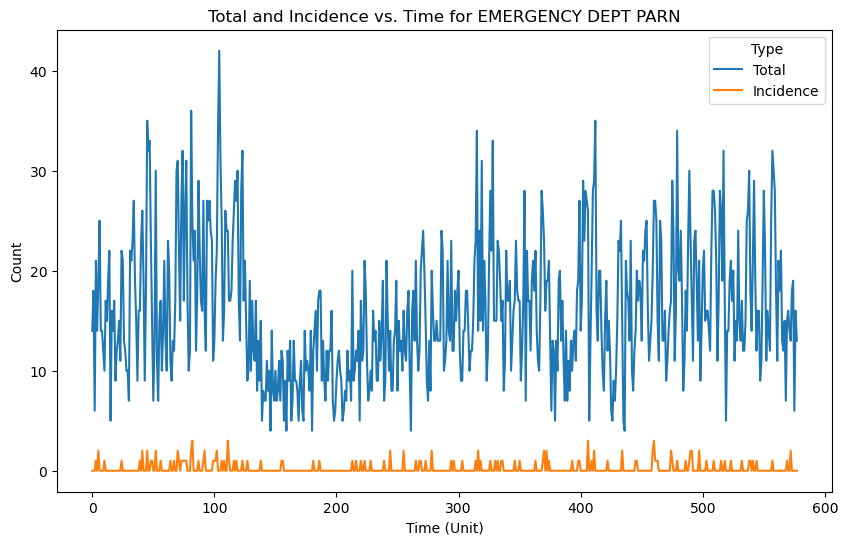

In [66]:
plot_incidence(simulation.nodes[simulation.node_names[1]])